<a href="https://colab.research.google.com/github/ProfessorDong/Deep-Learning-Course-Examples/blob/master/RNN_Examples/StockPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Futile Stock Price Prediction with LSTM

This project predicts stock prices based on historical financial data using RNN LSTM.  It is a good practice of LSTM but does absolutely nothing for financial speculation as I believe stock prices follow a random walk process.


In [1]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

     |████████████████████████████████| 11.3 MB 5.0 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.3 which is incompatible.


     |████████████████████████████████| 109 kB 5.1 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


After you upgraded pandas and pandas-datareader, restart runtime before excuting the following codes.

In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [21]:
# Get the stock quote
df = web.DataReader('OMC', data_source='yahoo', start='2010-01-01', end='2021-09-30')
print(df.head())
# print(df)

                 High        Low       Open      Close     Volume  Adj Close
Date                                                                        
2010-01-04  39.740002  39.360001  39.500000  39.619999  1670800.0  28.276274
2010-01-05  39.610001  39.160000  39.540001  39.480000  1807900.0  28.176361
2010-01-06  39.500000  39.020000  39.320000  39.169998  2500500.0  27.955107
2010-01-07  39.209999  38.720001  39.110001  38.939999  2520200.0  27.790964
2010-01-08  39.549999  38.590000  38.720001  39.389999  1935700.0  28.112125


(2957, 6)


<function matplotlib.pyplot.show>

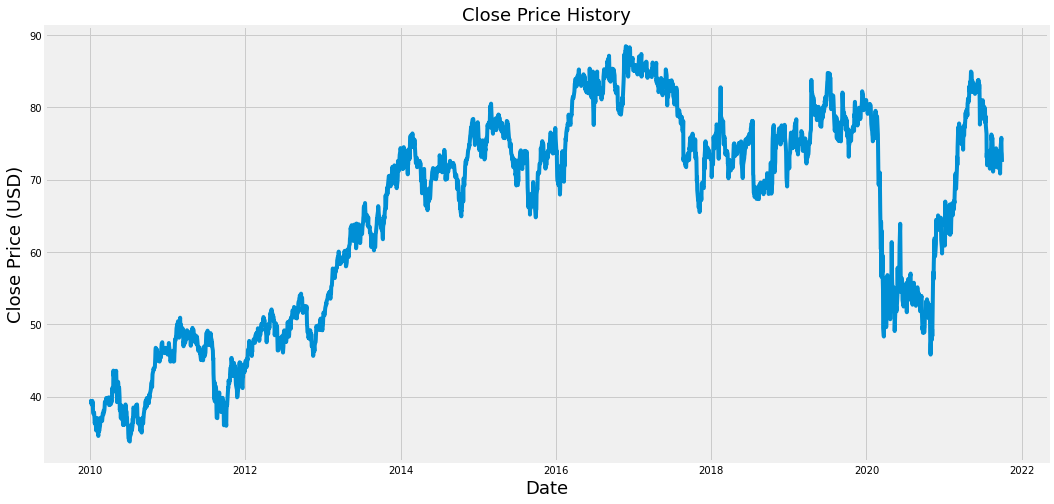

In [22]:
# Get the number of rows and columns in the data set
print(df.shape)
# Visualize the closing price history
plt.figure(figsize=(16,8))
plt.plot(df['Close'])
plt.title('Close Price History', fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price (USD)', fontsize=18)
plt.show

In [23]:
# Create a new dataframe with only the Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)*.8)
print(training_data_len)

2366


In [24]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
print(scaled_data)

[[0.10694695]
 [0.10438755]
 [0.09872025]
 ...
 [0.73382089]
 [0.72723953]
 [0.70731258]]


In [25]:
# Create the training dataset
# Create the scaled training dataset
train_data = scaled_data[0:training_data_len, :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

sequence_len = 80

for i in range(sequence_len, len(train_data)):
  x_train.append(train_data[i-sequence_len:i, 0])
  y_train.append(train_data[i, 0])
  if i<=sequence_len+1:
    print(x_train)
    print(y_train)
    print()

[array([0.10694695, 0.10438755, 0.09872025, 0.0945155 , 0.10274221,
       0.10274221, 0.0906764 , 0.09853746, 0.07934187, 0.07111516,
       0.07367457, 0.06800733, 0.05959777, 0.04606948, 0.05210235,
       0.05082265, 0.04076782, 0.03802556, 0.02797073, 0.04131624,
       0.05795243, 0.05941499, 0.03638022, 0.02760509, 0.01407679,
       0.02705666, 0.03619743, 0.03272397, 0.0261426 , 0.03985375,
       0.04716633, 0.05502739, 0.06032905, 0.05868371, 0.05301641,
       0.05685559, 0.05210235, 0.05210235, 0.0714808 , 0.07111516,
       0.07056674, 0.0683729 , 0.0784278 , 0.0771481 , 0.08153563,
       0.09268738, 0.10036559, 0.10127972, 0.09853746, 0.10000002,
       0.109872  , 0.10585011, 0.09707498, 0.10767823, 0.11060328,
       0.10932357, 0.10968921, 0.11042049, 0.10603289, 0.11170019,
       0.09213896, 0.09250459, 0.10000002, 0.10292506, 0.0937843 ,
       0.0989031 , 0.10383913, 0.10000002, 0.10475319, 0.12870203,
       0.13583181, 0.12358315, 0.13436926, 0.17934189, 0.1663

In [26]:
# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data for the LSTM model
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2286, 80, 1)

In [27]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(60, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(60, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 80, 60)            14880     
_________________________________________________________________
lstm_3 (LSTM)                (None, 60)                29040     
_________________________________________________________________
dense_2 (Dense)              (None, 25)                1525      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 26        
Total params: 45,471
Trainable params: 45,471
Non-trainable params: 0
_________________________________________________________________


In [28]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [29]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=2)

Epoch 1/2
2286/2286 [==============================] - 85s 36ms/step - loss: 0.0020
Epoch 2/2
2286/2286 [==============================] - 84s 37ms/step - loss: 7.1376e-04


In [30]:
# Create the testing data set
# Create a new array containing scaled values indexed from (training_data_len - sequence_len) to the end.
test_data = scaled_data[training_data_len - sequence_len:, :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(sequence_len, len(test_data)):
  x_test.append(test_data[i-sequence_len:i, 0])

In [31]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [32]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [33]:
# Get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [34]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
print(rmse)

1.0269617251736662


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


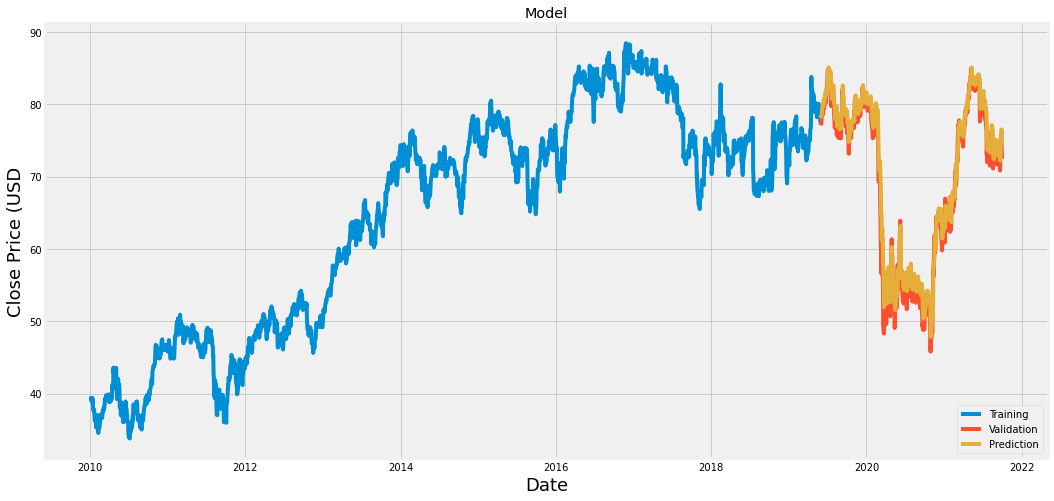

In [35]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visulize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price (USD', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Training', 'Validation', 'Prediction'], loc='lower right')
plt.show()

In [36]:
# Show the valid and predicted prices
print(valid)

                Close  Predictions
Date                              
2019-05-30  77.540001    78.570747
2019-05-31  77.360001    78.369209
2019-06-03  77.320000    78.288818
2019-06-04  78.029999    78.296303
2019-06-05  78.260002    78.797043
...               ...          ...
2021-09-24  74.730003    74.428444
2021-09-27  75.790001    75.539093
2021-09-28  73.910004    76.531425
2021-09-29  73.550003    75.603111
2021-09-30  72.459999    74.716202

[591 rows x 2 columns]


In [40]:
# Get the quote
test_quote = web.DataReader('OMC', data_source='yahoo', start='2010-01-01', end='2021-09-29')
# Create a new dataframe
new_df = test_quote.filter(['Close'])
# Get the last 80 day closing price values and convert the dataframe to an array
last_80_days = new_df[-80:].values
# Scale the data to be values between 0 and 1
last_80_days_scaled = scaler.transform(last_80_days)
# Create an empty list
X_test = []
# Append the past 80 days
X_test.append(last_80_days_scaled)
# Convert the X_test data set to a numpy array
X_test = np.array(X_test)
# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# Get the predicted scaled price
pred_price = model.predict(X_test)
# Inverse scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[74.716194]]


In [42]:
test_quote2 = web.DataReader('OMC', data_source='yahoo', start='2021-09-30', end='2021-09-30')
print(test_quote2['Close'])

Date
2021-09-30    72.459999
Name: Close, dtype: float64
